## PM2.5 Data Prepocessing and Exploration 

In this Side project I want to prepocess and get some basic information about Air quality data via some tool. The project will be based on the tasks below.The dataset can be found https://sites.google.com/site/cclljj/dataset-airbox. If any one is interest to explore more insight of Air quality data  

### 1. Preprocessing Task
       A. Discovering of bad data and how to fix/remove it
           i. Remove the anomal records. For, instance '0' attributes of PM2.5
           ii. Remove Sensors(Devices) with few data or long time gap
       
       B. Data Aliggnment
            i. We want to aligned-time data. However, the sensors don't have 
               a static record time. To overcome this challenge, we will can use
               linear interpolation to fit our data.
               
       C. Save New dataset to a file
       
       
### 2. Observation(Visualization)Task
       A. To compare different sensors in the same time interval. 
          For instance, Sensor 1 on 5/9 vs Sensor 2 on 5/9
          
       B. Plotting of all Sensors on the map and describe the dataset based on the location
          using this visualization tool(https://www.gpsvisualizer.com/map_input?form=data)
       
       C. Find some interesting observation
       
### 3. QueryTask
        A. How Many sensors are there in the the dataset?
        
        B. Which sensor recorded the highest temperature:
            i.  In March?
            ii. What is the Temperature?
            iii. Where is the sensor located?
            
        C. What were the maximal PM2.5 values of each sensors on 3/5?
        
        D. Find some interesting queries.
            
### 3. Time Series Data Comparsion Task
        Try to consider two sensor to compare the following:
        
        For, instance considering. 
             1. Q: Sequence from Sensor 1.
             2. C: Sequence from Sensor 2.
             3. Distance(Q,C): Distance between Q & C.
             
        A. Offset Translation.
           Q = Q - mean(Q), C = C - Mean(C).
           
        B. Amplitude Scaling.
            Q = ( Q - mean(Q))/std(Q), C = (C - Mean(C))/std(C).
        
        C. Linear Trend Removal.
           Q = detrend(Q), C = detrend(C).
           
        D. Noise Removal.
           Q = smooth(Q), C = smooth(C).
           
        E. Calculate Distance(Q,C) at each step, and compare the difference between
           original data and transformed it.
           


## Tasks 1.
   Data Prepocessing


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Discovering of bad data and how to fix/remove it?

In [3]:
df = pd.read_csv("201703_Taiwan.csv")

df.head()


,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
0,2017-03-01,08:00:00,74DA388FF5F6,41,48,28,20.00,89,25.059,121.499
1,2017-03-01,08:00:01,28C2DDDD4781,41,0,0,23.37,73,23.483,120.443
2,2017-03-01,08:00:01,74DA3895E132,52,66,35,25.50,60,22.624,120.356
3,2017-03-01,08:00:02,74DA3895C590,39,44,26,20.25,79,24.252,120.739
4,2017-03-01,08:00:02,74DA3895C34E,42,56,30,21.12,78,24.196,120.748


In [4]:
print("Number of data point before Dropping '0' and 'NaN' values =",len(df))

Number of data point before Dropping '0' and 'NaN' values = 4191423


### How to remove the anomal records. For, instance '0' attributes of PM2.5?
 To remove the anomal attribute we are going to Drop all the zero '0' or  'NaN' values in the dataset.

In [5]:
droplist=[]
for attr in df.columns:
    for index, value in enumerate(df[attr]):
        if value == 0:
            droplist.append(index)            
df_n0 = df.drop(df.index[droplist])

df_n0 = df_n0.dropna(axis=0, how='any')
#df_n0.head()
print("Number of data point after Dropping '0' and 'NaN' values =",len(df_n0))

print("=======================================================================")

df_n0.head()

Number of data point after Dropping '0' and 'NaN' values = 3341162


,Date,Time,device_id,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon
0,2017-03-01,08:00:00,74DA388FF5F6,41,48,28,20.00,89,25.059,121.499
2,2017-03-01,08:00:01,74DA3895E132,52,66,35,25.50,60,22.624,120.356
3,2017-03-01,08:00:02,74DA3895C590,39,44,26,20.25,79,24.252,120.739
4,2017-03-01,08:00:02,74DA3895C34E,42,56,30,21.12,78,24.196,120.748
5,2017-03-01,08:00:02,74DA3895E12A,74,92,54,21.00,83,22.633,120.359




### How to remove Sensors(Devices) with few data or long time gap?
Firstly we will plot a histogram and group our data by 'Device_ID' to know from what point to what ponint is having less datcount so that we can know where to set out threshold in filtering sensors with few data point. 

 

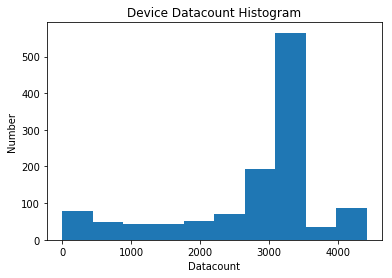

Base on the histogram we can observe that their is a less datacount from '0' To '2000' counts therefore, the threshold can be set to '> 2000' for the firt use case i.e. Device with few data point 


In [6]:
device_histagram_list = []
for device_id, df_device_id_region in df_n0.groupby("device_id"):
    device_histagram_list.append(df_device_id_region.shape[0])
    

plt.hist(device_histagram_list)
plt.title("Device Datacount Histogram")
plt.xlabel("Datacount")
plt.ylabel("Number")        

plt.show()

print("=======================================================================")

print("Base on the histogram we can observe that their is a less datacount from '0' To '2000' counts therefore, the threshold can be set to '> 2000' for the firt use case i.e. Device with few data point "  )




### Removing Sensors(Devices) with few data when threshold is set to "> 2000"

In [7]:
device_id_list = {}
ori_count = 0
for device_id, df_device_id_region in df_n0.groupby("device_id"):
    ori_count += 1
    if df_device_id_region.shape[0]>2000:
        device_id_list[device_id] = df_device_id_region


print("=======================================================================")

print ("Total number of Devices avalable before filtering few data point with >2000  = " + str(ori_count))   

print("=======================================================================")

print ("Total number of Devices avalable after filtering few data point with >2000  =", len( device_id_list) )


Total number of Devices avalable before filtering few data point with >2000  = 1211
Total number of Devices avalable after filtering few data point with >2000  = 976


### Removing Sensors(Devices) with longer time when threshold is set to "> 8hr"

In [14]:

print("=======================================================================")
device_id_list2 = {}
for device_id, df_device_id_region in device_id_list.items():
#     print (df_device_id_region)
    time_c = pd.to_datetime(df_device_id_region['Time'])
    time_c = time_c.dt.hour + time_c.dt.minute/60
    
    keep_or_not= True
    last_time=0
    for time_value in time_c:
        last_time = time_value if last_time==0 else last_time
 
        if time_value - last_time > 8:
#             print (time_value)
#             print (last_time)
            keep_or_not = False
            break
        last_time = time_value

    if keep_or_not:
        device_id_list2[device_id] = df_device_id_region
        
print ("Total number of Devices avalable after filtering out devices with a gap  > 8hrs =", len(device_id_list2))

Total number of Devices avalable after filtering out devices with a gap  > 8hrs = 756


### Data alignment

1. For instance, if we want to align the sample rate to 1 record every 10min we can calculate PM2.5 value at 17:04 by using the value at 17:10 and 17:18 at17:20 using interpolation.

2. We will filter(drop) out some columns that we are not interested to analyze, such as "PM10. PM1, Temperature, Humidity"

3. We will  save our new dataset in a new CSV file 


In [17]:
i=0

sensor_list=[]

for device_id, df_device_id_region in device_id_list2.items():
    alignment_frame = df_device_id_region.drop(df_device_id_region.columns[[4,5,6,7]], axis=1)
    
    time_c = pd.to_datetime(alignment_frame['Time'])
    time_c_begin = time_c.dt.hour[time_c.dt.hour.index[0]]
    
    row_list=[]
    for row in range(alignment_frame.shape[0]):
        if row in row_list:
            continue
        pm25_list=[]
        now_time = time_c.dt.hour[time_c.dt.hour.index[row]]
        alignment_frame.loc[alignment_frame.index[row],['Time']]=now_time
        
        tmp = row
        tmp_row_list=[]
        while now_time == time_c_begin:
            try: 
                pm25_list.append(alignment_frame.loc[alignment_frame.index[tmp],['PM2.5']])
                tmp_row_list.append(tmp)
                tmp=tmp+1
                now_time = time_c.dt.hour[time_c.dt.hour.index[tmp]]
            except:
                break
                
        if tmp_row_list[1:] != []:
            row_list.extend(tmp_row_list[1:])

        if pm25_list != []:
            try:
                avg_pm25 = ( sum(pm25_list)/len(pm25_list))
                alignment_frame.loc[alignment_frame.index[row],['PM2.5']] = avg_pm25[0]
                time_c_begin = now_time
            except:
                break
    alignment_frame = alignment_frame.drop(alignment_frame.index[row_list], axis=0)
    
    
    for row in range(alignment_frame.shape[0]-1):
        now_time = alignment_frame.loc[alignment_frame.index[row],['Time']]
        next_time = alignment_frame.loc[alignment_frame.index[row+1],['Time']]
        
        count = next_time-now_time
        
        if int(count) != 1 and int(count) != -23:
            now_PM25 = alignment_frame.loc[alignment_frame.index[row],['PM2.5']]
            next_PM25 = alignment_frame.loc[alignment_frame.index[row+1],['PM2.5']]
            
            now_PM25= np.array(now_PM25)
            next_PM25= np.array(next_PM25)
            count = np.array(count)
            
            alignment_frame.loc[alignment_frame.index[row]+1,['PM2.5']] = ((now_PM25+next_PM25)/count)[0]
            alignment_frame.loc[alignment_frame.index[row]+1,['Date']] = alignment_frame.loc[alignment_frame.index[row],['Date']][0]
            alignment_frame.loc[alignment_frame.index[row]+1,['Time']] = alignment_frame.loc[alignment_frame.index[row],['Time']][0]+1
    
    alignment_frame.index = alignment_frame.index+1
    alignment_frame = alignment_frame.sort_index()

    alignment_frame.to_csv('sensor_%s' %device_id)
    
    sensor_list.append(device_id)
    
    i += 1
    if i==2:
        break

## Observation Tasks

### Compare sensors

We compare this two Sensor1=74DA3895E03E Vs Sensor2=74DA3895E004 obtain at a given 'Date' interval after interpolation to see weather the output is similar



In [15]:
sensor1 = pd.read_csv("sensor_74DA3895E03E")

sensor1_2017_03_10 = sensor1.loc[sensor1['Date'] == '2017-03-10']

sensor1_2017_03_10.head()

,Unnamed: 0,Date,Time,device_id,PM2.5,lat,lon
208,939128,2017-03-10,0,74DA3895E03E,78.500000,22.853,120.546
209,944147,2017-03-10,1,74DA3895E03E,76.500000,22.853,120.546
210,949581,2017-03-10,2,74DA3895E03E,75.000000,22.853,120.546
211,953836,2017-03-10,3,74DA3895E03E,77.333333,22.853,120.546
212,957928,2017-03-10,4,74DA3895E03E,77.857143,22.853,120.546


In [16]:
sensor2 = pd.read_csv("sensor_74DA3895E004")

sensor2_2017_03_10 = sensor2.loc[sensor2['Date'] == '2017-03-10']

sensor2_2017_03_10.head()

,Unnamed: 0,Date,Time,device_id,PM2.5,lat,lon
208,939802,2017-03-10,0,74DA3895E004,93.00,23.012,120.217
209,944832,2017-03-10,1,74DA3895E004,86.00,23.012,120.217
210,949905,2017-03-10,2,74DA3895E004,86.75,23.012,120.217
211,954984,2017-03-10,3,74DA3895E004,97.00,23.012,120.217
212,960073,2017-03-10,4,74DA3895E004,98.50,23.012,120.217


### Interesting Observation


It can be observed that sensor1 and sensor2 have the almost has similar trend. In the early morning and at night, we can observe higher PM2.5 value during the day from starting from 1000(10a.m) it starts showing slow down it 1500(3p.m). However one of the sensor rises to the peak in the evening, and the other at night. Maybe the difference in the peak is lead different timing during the rush hour. For instance people move together in the morning when going to work but closing time some might stay late due to overtime that's what might result to differnt peak during the evening.



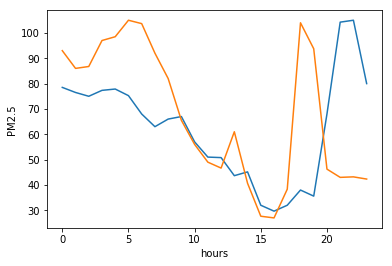

In [12]:
import matplotlib.pyplot as plt

s1PM25 = np.array(sensor1_2017_03_10['PM2.5'])
s2PM25 = np.array(sensor2_2017_03_10['PM2.5'])
time = np.array(sensor1_2017_03_10['Time'])

plt.plot(time,s1PM25,time, s2PM25)
plt.xlabel('hours')
plt.ylabel('PM2.5')

plt.show()


### Plot sensor map
 We plot all the Sensors on the map by importing our data into map visualization tools  (https://www.gpsvisualizer.com/map_input?form=data and google map) to know the location of some sensors. Based on the visualization on the map we can observe that most of the sensors are mainly located at Taiwan, with some in Japan, South Korea, Malaysia, and even in India. 

In [49]:
sensor_gps = pd.DataFrame(columns=['lat','lon'])
for device_id, df_device_id_region in device_id_list2.items():

    lat = df_device_id_region.loc[df_device_id_region.index[0],[' lat']]
    lon = df_device_id_region.loc[df_device_id_region.index[0],[' lon']]
    
    lat = lat.values[0]
    lon = lon.values[0]

    sensor_gps.loc[device_id] = [lat,lon]

sensor_gps.to_csv('sensor_gps', index=False)

![title](gps.PNG "ShowMyImage")

### The command below shows the sensor locations on the on google map

In [35]:
from webbrowser import open
open("https://drive.google.com/open?id=12iLOaTSyL9ASRcaGAfIrK6mJX_5uEXc9&usp=sh" )

True

### 3. QueryTask
        A. How Many sensors are there in the the dataset?
        
        B. Which sensor recorded the highest temperature:
            i.  In March?
            ii. Where is the sensor located?
            
        C. What sensor has the maximal PM2.5 values on 3/5?
        

In [20]:
max_temp = 0
sen_lat = 0
sen_lon = 0
sen_tem_id = ''

columns=['device_id', 'PM2.5']
sensor_PM25= pd.DataFrame(columns=columns)

index=0
for device_id, df_device_id_region in device_id_list2.items():
    
    if df_device_id_region['Temperature'].values.max() > max_temp:
        max_temp = df_device_id_region['Temperature'].values.max()
        sen_lat = df_device_id_region[' lat'].values[0]
        sen_lon = df_device_id_region[' lon'].values[0]
        sen_tem_id = df_device_id_region['device_id'].values[0]
        
    
    sensor_PM25.loc[index] = [device_id, df_device_id_region.loc[df_device_id_region['Date'] == '2017-03-05']['PM2.5'].max()]
    
    index=index+1    

print ("Number of Sensors = ", len(sensor_PM25)) 
print ("Maximum temperature in March = " + str(max_temp) + ' Degrees')
print ("Latitude = " + str(sen_lat ) , ": Longitute = " + str(sen_lon))
#print ( "longitute = " + str(sen_lon))
print ("Sensor ID" + sen_tem_id + " has the maximal PM2.5 values on 3/5" )



Number of Sensors =  756
Maximum temperature in March = 52.25 Degrees
Latitude = 22.669 : Longitute = 120.3
Sensor ID74DA3895DFB2 has the maximal PM2.5 values on 3/5


### 3. Time Series Data Comparsion Task
        We will compare two sensor data on 2017-3-10  and observe 
        the PM2.5 in diferent use Contition.   
        For, instance considering. 
             1. Q: Sequence from Sensor 1.
             2. C: Sequence from Sensor 2.
             3. Distance(Q,C): Distance between Q & C.
             
        


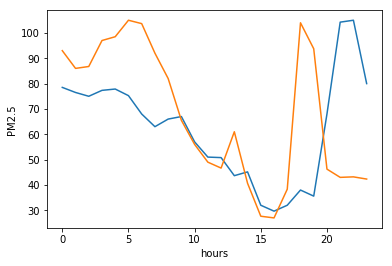

Euclidean Distance between Q & C is = 148.71696475713847


In [21]:
from math import sqrt
def euclidean_distance(A,B):
    return sqrt( sum (  (a-b)**2 for a,b in zip(A,B)  ) )


Q = sensor1.loc[sensor1['Date'] == '2017-03-10']['PM2.5']
C = sensor2.loc[sensor2['Date'] == '2017-03-10']['PM2.5']

Q_ori = np.array(Q)
C_ori = np.array(C)
time = np.array(sensor1.loc[sensor1['Date'] == '2017-03-10']['Time'])

plt.plot(time, Q_ori, time, C_ori)
plt.xlabel('hours')
plt.ylabel('PM2.5')

plt.show()

print ("Euclidean Distance between Q & C is = %s" %euclidean_distance(Q_ori ,C_ori))



### Offset Translation

       A. Offset Translation.
           Q = Q - mean(Q), C = C - Mean(C).
           
 The plot shows that the distance between the two points are getting little bit closer.
           

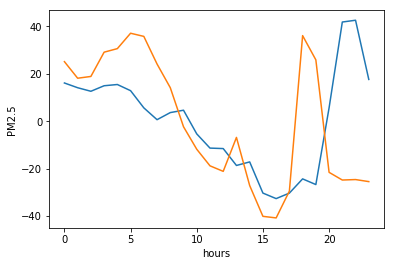

Euclidean Distance for the Offset Translation is = 146.26725623770773


In [22]:
def offset_translation(sequence):
    mean = sum(sequence)/len(sequence)
    return sequence-mean

Q_offset = np.array(offset_translation(Q))
C_offset = np.array(offset_translation(C))

time = np.array(sensor1.loc[sensor1['Date'] == '2017-03-10']['Time'])

plt.plot(time, Q_offset, time, C_offset)
plt.xlabel('hours')
plt.ylabel('PM2.5')

plt.show()

print ("Euclidean Distance for the Offset Translation is = %s" %euclidean_distance(Q_offset ,C_offset))


### Amplitude Scaling

      B. Amplitude Scaling.
            Q = ( Q - mean(Q))/std(Q), C = (C - Mean(C))/std(C).
            
Distance drops significantly from 148.7 to 6.1 when we apply amplitute scaling          

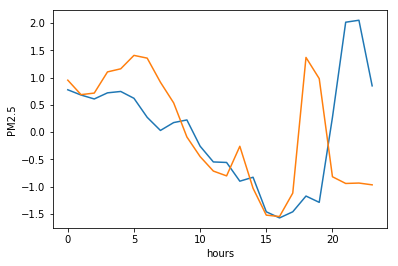

Euclidean Distance for Amplitude Scaling is = 6.125405142709108


In [23]:
from sklearn.preprocessing import StandardScaler

def amplitude_scaling(sequence):
    mean = sum(sequence)/len(sequence)
    std = np.std(sequence)
    return (sequence-mean)/std

Q_amplitude = np.array(amplitude_scaling(Q))
C_amplitude = np.array(amplitude_scaling(C))

time = np.array(sensor1.loc[sensor1['Date'] == '2017-03-10']['Time'])

plt.plot(time, Q_amplitude, time, C_amplitude)
plt.xlabel('hours')
plt.ylabel('PM2.5')

plt.show()

print ("Euclidean Distance for Amplitude Scaling is = %s" %euclidean_distance(Q_amplitude ,C_amplitude))

### Linear Trend Removal
           Q = detrend(Q), C = detrend(C).
           
      





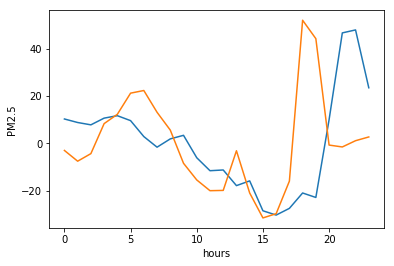

Euclidean_distance= 130.6034062199002
------------------------------------------------------------------------
We Apply linear regression model from Sklearn learn and fit our data to compare the distance relationship between the two sensors 
 fItting we can observe a significan improvment on the distance relationship from '148' to '130' 


In [24]:
from sklearn import datasets, linear_model
def linear_trend_removel(sequence):
    regr = linear_model.LinearRegression()
    x = np.arange(24)[:,np.newaxis]
    y = np.array(sequence)[:,np.newaxis]
    regr.fit( x, y)
    line =  np.array(list( map(lambda x: regr.predict(x), np.arange(24)) ))[:,0,0]
    return sequence - line
#lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
#lin_reg_2.predict(np.array([6.5]).reshape(1, 1))
    
Q_linear_tr = np.array(linear_trend_removel(Q))
C_linear_tr = np.array(linear_trend_removel(C))

time = np.array(sensor1.loc[sensor1['Date'] == '2017-03-10']['Time'])

plt.plot(time, Q_linear_tr, time, C_linear_tr)
plt.xlabel('hours')
plt.ylabel('PM2.5')

plt.show()

print ("Euclidean_distance= %s" %euclidean_distance(Q_linear_tr ,C_linear_tr))

print("------------------------------------------------------------------------")

print("We Apply linear regression model from Sklearn learn and fit our data to compare the distance relationship between the two sensors \n fItting we can observe a significan improvment on the distance relationship from '148' to '130' ")

### Noise Removal

         Q = smooth(Q), C = smooth(C).
           

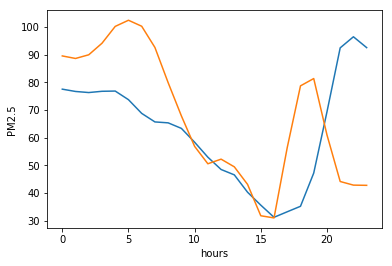

Euclidean_distance= 124.40368418813713
-------------------------------------------------------------------------------
We apply this fitting to balance the 'LEFT' and 'RIGHT' Neighor


In [25]:
def noise_removal(sequence):
    sequence = np.array(sequence)
    new_sequence = []
    for index, number in enumerate(sequence):
        if index == 0:
            new_sequence.append( (number+sequence[index+1])/2 )
        elif index == len(sequence)-1:
            new_sequence.append( (number+sequence[index-1])/2 )
        else:
            new_sequence.append((number+sequence[index+1]+sequence[index-1])/3 ) 
    return new_sequence

Q_noise_removal = np.array(noise_removal(Q))
C_noise_removal = np.array(noise_removal(C))


time = np.array(sensor1.loc[sensor1['Date'] == '2017-03-10']['Time'])

plt.plot(time, Q_noise_removal, time, C_noise_removal)
plt.xlabel('hours')
plt.ylabel('PM2.5')

plt.show()

print ("Euclidean_distance= %s" %euclidean_distance(Q_noise_removal ,C_noise_removal))

print ("-------------------------------------------------------------------------------")

print ("We apply this fitting to balance the 'LEFT' and 'RIGHT' Neighor")

### Calculate Distance(Q,C) at each step, and compare the difference between original data and transformed it.
  
      We therefore apply the formular below:
  
           Amplitude Scaling + Linear Trend Removal + Noise Removal


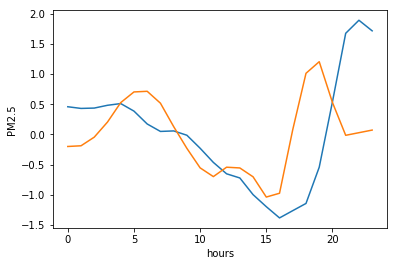

Euclidean_distance= 4.568454860041959
--------------------------------------------------------------
After we calculate distance from each step as stated we can observe that 
 The distance relation become closer compare to Amplitude Scaling 


In [28]:
Q_final = np.array(noise_removal(linear_trend_removel(amplitude_scaling(Q))))
C_final = np.array(noise_removal(linear_trend_removel(amplitude_scaling(C))))


time = np.array(sensor1.loc[sensor1['Date'] == '2017-03-10']['Time'])

plt.plot(time, Q_final, time, C_final)
plt.xlabel('hours')
plt.ylabel('PM2.5')

plt.show()

print ("Euclidean_distance= %s" %euclidean_distance(Q_final ,C_final))

print("--------------------------------------------------------------")

print("After we calculate distance from each step as stated we can observe that \n The distance relation become closer compare to Amplitude Scaling ")

### I will do my best to publish one project in data mining every month using PM2.5 Dataset

### Next project will be using the ASSOCIATION RULE Mining Technique on the same dataset